In [14]:
import numpy as np
import matplotlib.pyplot as plt
# import the adfuller function from statsmodel 
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf


In [15]:
def show_acf(y):
    # ACF plot
    plot_acf(y, lags = 50)
    plt.title('Autocorrelation Function (ACF)')
    plt.show()

In [16]:
def plot_path(y):
        # Plot the simulated process for each alpha in a separate figure
    plt.figure()
    plt.plot(y, label=f'Simulated Counts (alpha={alpha})')
    plt.xlabel('Time Period')
    plt.ylabel('Count')
    plt.title(f'Simulated Log-linear Transition Process (alpha={alpha})')
    plt.legend()
    plt.show()

In [17]:
def test_staionarity(y):
    
    res = adfuller(y)

    # Printing the statistical result of the adfuller test
    print('Augmneted Dickey_fuller Statistic: %f' % res[0])
    print('p-value: %f' % res[1])

    # printing the critical values at different alpha levels.
    print('critical values at different levels:')
    for k, v in res[4].items():
        print('\t%s: %.3f' % (k, v))
    

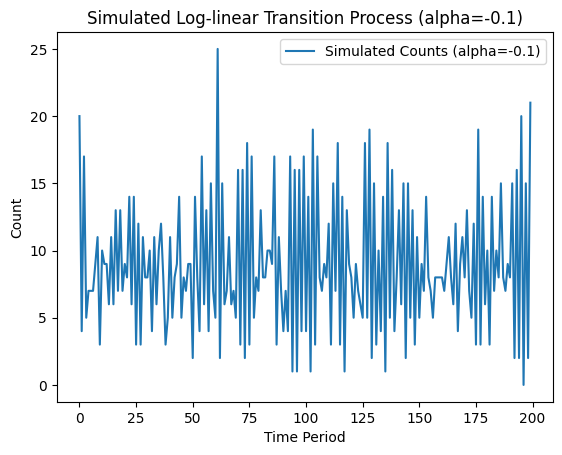

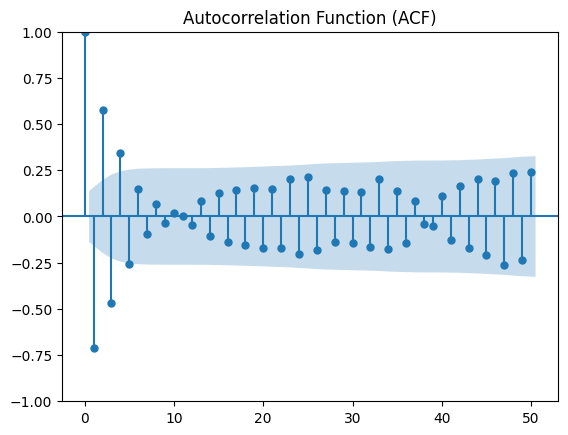

Augmneted Dickey_fuller Statistic: -11.391352
p-value: 0.000000
critical values at different levels:
	1%: -3.464
	5%: -2.876
	10%: -2.575


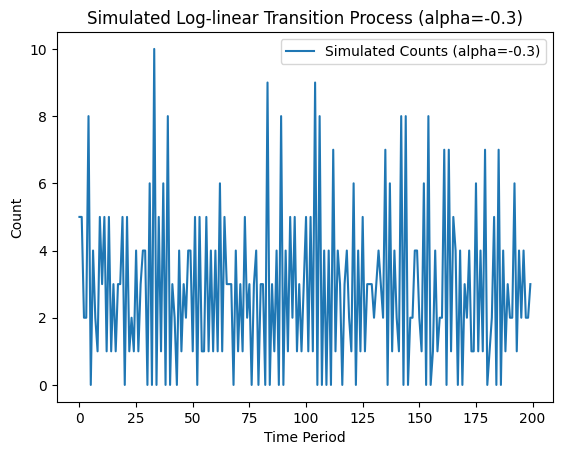

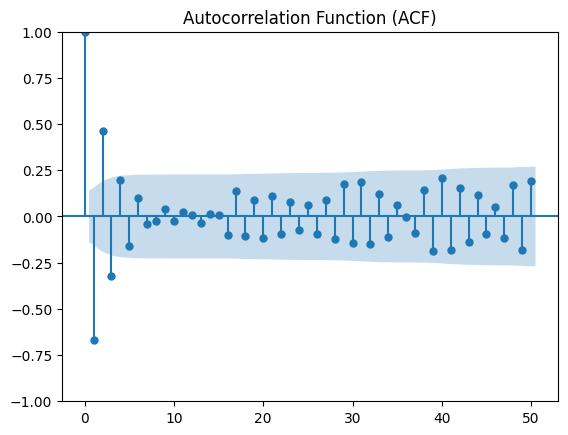

Augmneted Dickey_fuller Statistic: -31.699204
p-value: 0.000000
critical values at different levels:
	1%: -3.464
	5%: -2.876
	10%: -2.575


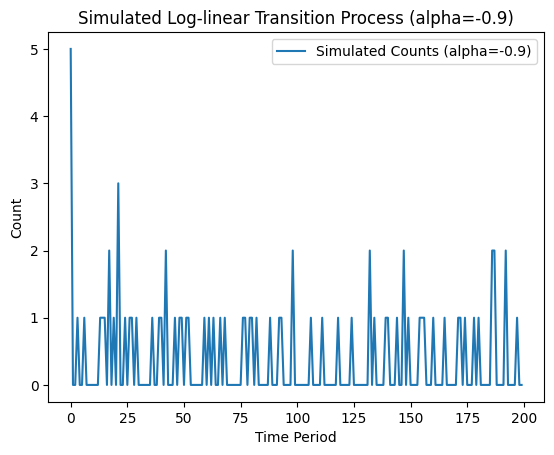

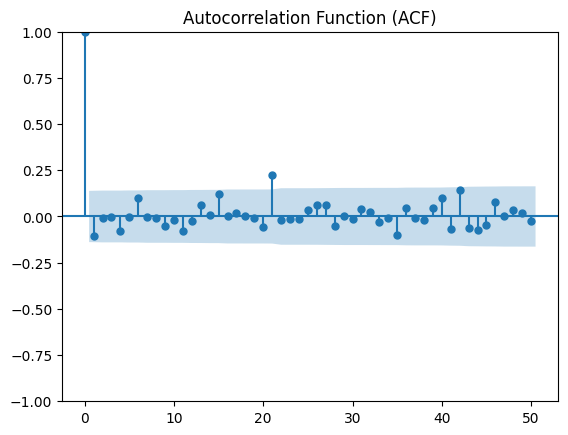

Augmneted Dickey_fuller Statistic: -17.942879
p-value: 0.000000
critical values at different levels:
	1%: -3.464
	5%: -2.876
	10%: -2.575


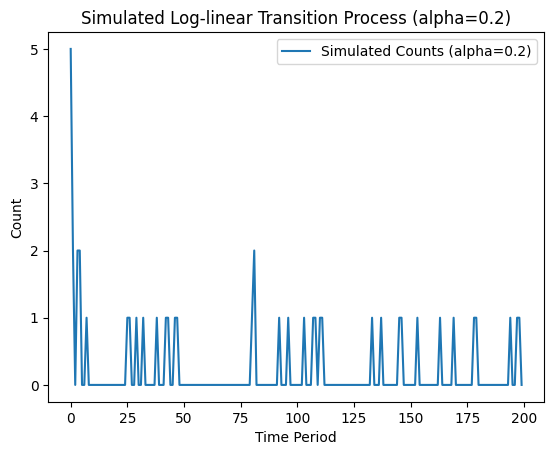

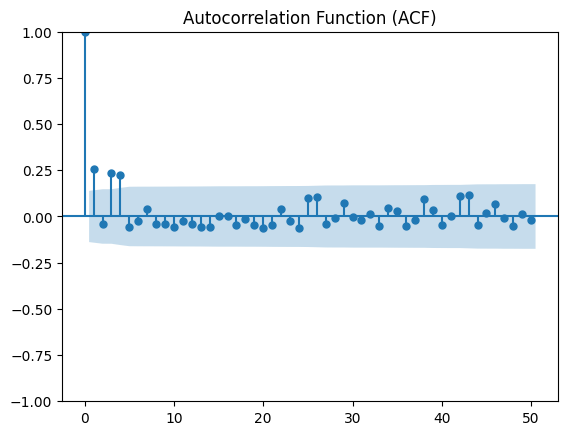

Augmneted Dickey_fuller Statistic: -7.376144
p-value: 0.000000
critical values at different levels:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [20]:
# Parameters
n_periods = 200
alpha_values = [-0.1, -0.3, -0.9, 0.2]  # Different alpha values
# mu = 10
mu_values = [20, 5, 0.5, 0.2]

initial_values = [20, 5, 5, 5]

# Simulate and plot for different alpha values
for i in range(len(alpha_values)):
    # Initial conditions
    alpha = alpha_values[i]
    mu = mu_values[i]
    
    y = np.zeros(n_periods)
    y[0] = initial_values[i]  # Initial count value

    # Simulate the process
    for t in range(1, n_periods):
        mu_ijc = mu * np.exp(alpha * y[t - 1])
        y[t] = int(np.random.poisson(mu_ijc))

    plot_path(y)
    show_acf(y)
    test_staionarity(y)

